DCGAN model implementation was inspired from https://github.com/csinva/gan-vae-pretrained-pytorch/tree/master/mnist_dcgan

# Imports

In [1]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np
%load_ext autoreload
%autoreload 2

from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# drive mount 
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [3]:
# drive mount 
import os
import sys 
#os.chdir('/content/drive/MyDrive/DCGAN')
os.chdir('/content/drive/My Drive/POLY/MAITRISE/semestre1/INF8225/INF8225 - Projet/codes/DCGAN')

# Dataset

In [4]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
tensor_train_X = torch.Tensor(train_X)
tensor_train_y = torch.Tensor(train_y)
tensor_test_X = torch.Tensor(test_X)
tensor_test_y = torch.Tensor(test_y)

11501568/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [5]:
X = np.zeros((train_X.shape[0], 784))
for i in range(train_X.shape[0]):
    X[i] = train_X[i].flatten()
X = pd.DataFrame(X)
Y = pd.DataFrame(train_y)


# Train the model

In [17]:
from __future__ import print_function
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils

dataroot = "data/"
workers = 2
batchSize = 64
imageSize = 64
nz = 100
ngf = 64
ndf = 64
niter = 100
lr = 0.0002
beta1 = 0.5
ngpu = 1
outf = "output_relu/"

In [6]:
class Generator_relu(nn.Module):
    def __init__(self, ngpu):
        super(Generator_relu, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(     nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2,     ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(    ngf,      nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        if input.is_cuda and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)
        return output

In [7]:
class Generator_relu_2D(nn.Module):
    def __init__(self, ngpu):
        super(Generator_relu_2D, self).__init__()
        self.ngpu = ngpu
        self.nz = 2
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(self.nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2,     ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(    ngf,      nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        if input.is_cuda and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)
        return output

In [8]:
class Generator_relu_200D(nn.Module):
    def __init__(self, ngpu):
        super(Generator_relu_2D, self).__init__()
        self.ngpu = ngpu
        self.nz = 200
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(self.nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2,     ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(    ngf,      nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        if input.is_cuda and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)
        return output

In [9]:
class Generator_relu_200D(nn.Module):
    def __init__(self, ngpu):
        super(Generator_relu_200D, self).__init__()
        self.ngpu = ngpu
        self.nz = 200
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(self.nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2,     ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(    ngf,      nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        if input.is_cuda and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)
        return output

In [10]:
class Generator_tanh(nn.Module):
    def __init__(self, ngpu):
        super(Generator_tanh, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(     nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.Tanh(),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.Tanh(),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.Tanh(),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2,     ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.Tanh(),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(    ngf,      nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        if input.is_cuda and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)
        return output

In [11]:
class Generator_sigmoid(nn.Module):
    def __init__(self, ngpu):
        super(Generator_sigmoid, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(     nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.Sigmoid(),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.Sigmoid(),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.Sigmoid(),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d(ngf * 2,     ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.Sigmoid(),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d(    ngf,      nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        if input.is_cuda and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)
        return output

In [12]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        if input.is_cuda and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)

        return output.view(-1, 1).squeeze(1)

In [18]:
try:
    os.makedirs(outf)
except OSError:
    pass

manualSeed = random.randint(1, 10000)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

cudnn.benchmark = True

dataset = dset.MNIST(root=dataroot, download=True,
                    transform=transforms.Compose([
                        transforms.Resize(imageSize),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5,), (0.5,)),
                    ]))
nc=1

assert dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batchSize,
                                         shuffle=True, num_workers=int(workers))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
ngpu = int(ngpu)
nz = int(nz)
ngf = int(ngf)
ndf = int(ndf)


# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        torch.nn.init.normal_(m.weight, 1.0, 0.02)
        torch.nn.init.zeros_(m.bias)


netG = Generator_relu(ngpu).to(device)
netG.apply(weights_init)
print(netG)

netD = Discriminator(ngpu).to(device)
netD.apply(weights_init)
print(netD)

criterion = nn.BCELoss()

fixed_noise = torch.randn(batchSize, nz, 1, 1, device=device)
real_label = 1
fake_label = 0

# setup optimizer
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

Generator_relu(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
 

In [ ]:
def plot_loss(x, yG, yD):
  plt.figure(figsize=(15, 15))
  plt.plot(x, yG, label = "Generator loss")
  plt.plot(x, yD, label = "Discriminator loss")

  # naming the x axis
  plt.xlabel('epoch')
  # naming the y axis
  plt.ylabel('loss')
  
  # show a legend on the plot
  plt.legend()
  
  # function to show the plot
  plt.show()

In [ ]:
x = []
yG = []
yD = []
for epoch in range(niter):
    for i, data in enumerate(dataloader, 0):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_cpu = data[0].to(device)
        batch_size = real_cpu.size(0)
        label = torch.full((batch_size,), real_label,
                           dtype=real_cpu.dtype, device=device)

        output = netD(real_cpu)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
              % (epoch, niter, i, len(dataloader),
                 errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
        if i % 100 == 0:
            vutils.save_image(real_cpu,
                    '%s/real_samples.png' % outf,
                    normalize=True)
            fake = netG(fixed_noise)
            vutils.save_image(fake.detach(),
                    '%s/fake_samples_epoch_%03d.png' % (outf, epoch),
                    normalize=True)
    # do checkpointing
    x.append(epoch)
    yG.append(errG.item())
    yD.append(errD.item())
    torch.save(netG.state_dict(), '%s/netG_epoch_%d.pth' % (outf, epoch))
    torch.save(netD.state_dict(), '%s/netD_epoch_%d.pth' % (outf, epoch))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[94/100][628/938] Loss_D: 70.4636 Loss_G: 85.5767 D(x): 0.0000 D(G(z)): 0.0000 / 0.0000
[94/100][629/938] Loss_D: 69.3849 Loss_G: 85.5107 D(x): 0.0000 D(G(z)): 0.0000 / 0.0000
[94/100][630/938] Loss_D: 69.8634 Loss_G: 82.1854 D(x): 0.0000 D(G(z)): 0.0000 / 0.0000
[94/100][631/938] Loss_D: 70.5581 Loss_G: 81.3958 D(x): 0.0000 D(G(z)): 0.0000 / 0.0000
[94/100][632/938] Loss_D: 68.5860 Loss_G: 82.9713 D(x): 0.0000 D(G(z)): 0.0000 / 0.0000
[94/100][633/938] Loss_D: 69.9917 Loss_G: 84.4082 D(x): 0.0000 D(G(z)): 0.0000 / 0.0000
[94/100][634/938] Loss_D: 70.3419 Loss_G: 89.4098 D(x): 0.0000 D(G(z)): 0.0000 / 0.0000
[94/100][635/938] Loss_D: 70.2401 Loss_G: 86.8319 D(x): 0.0000 D(G(z)): 0.0000 / 0.0000
[94/100][636/938] Loss_D: 70.8603 Loss_G: 83.9759 D(x): 0.0000 D(G(z)): 0.0000 / 0.0000
[94/100][637/938] Loss_D: 68.7808 Loss_G: 86.3454 D(x): 0.0000 D(G(z)): 0.0000 / 0.0000
[94/100][638/938] Loss_D: 68.9915 Loss_G: 

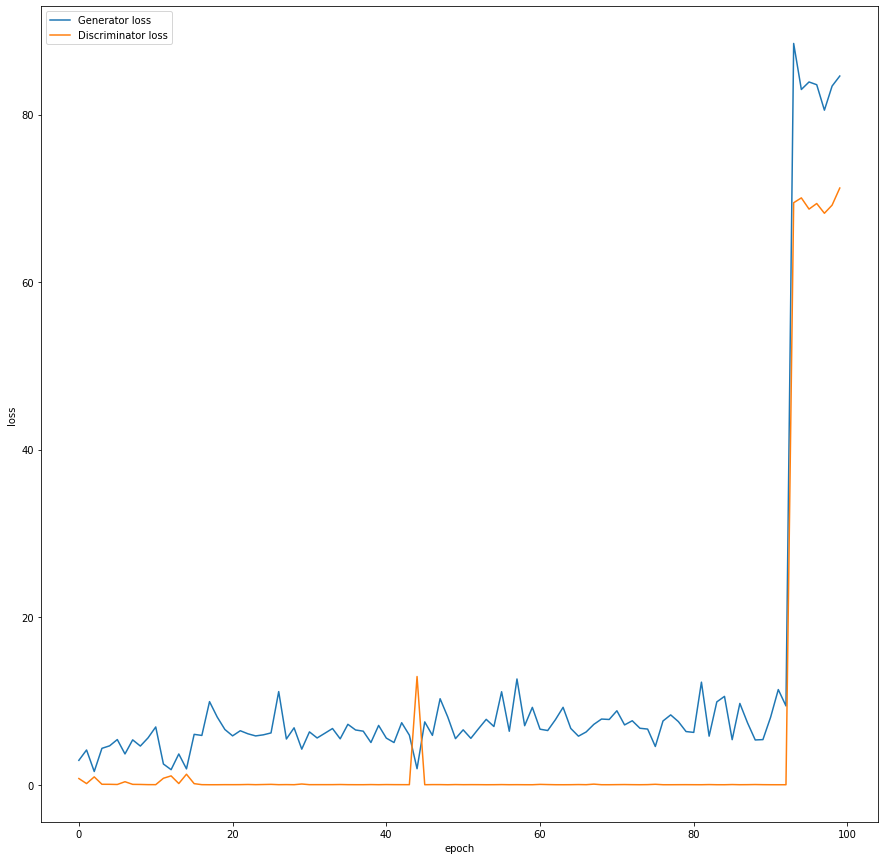

In [ ]:
plot_loss(x, yG, yD)

# Projecting the MNIST dataset pixel space using t-SNE

In [ ]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(X.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
X['label'] = Y
sns.scatterplot(x = tsne_results[:,0], y = tsne_results[:,1], hue = X['label'], palette = sns.hls_palette(10), legend = 'full');

# Importing DCGAN model and it weights

In [19]:
num_gpu = 1 if torch.cuda.is_available() else 0

D_relu = Discriminator(ngpu=1).eval()
D_tanh = Discriminator(ngpu=1).eval()
D_sigmoid = Discriminator(ngpu=1).eval()
D_relu_2D = Discriminator(ngpu=1).eval()
D_relu_200D = Discriminator(ngpu=1).eval()


G_relu = Generator_relu(ngpu=1).eval()
G_tanh = Generator_tanh(ngpu=1).eval()
G_sigmoid = Generator_sigmoid(ngpu=1).eval()
G_relu_2D = Generator_relu_2D(ngpu=1).eval()
G_relu_200D = Generator_relu_200D(ngpu=1).eval()


# load weights
D_relu.load_state_dict(torch.load('DCGAN_models/output_ReLU_100D/netD_epoch_96.pth'))
D_tanh.load_state_dict(torch.load('DCGAN_models/output_tanh_100D/netD_epoch_96.pth'))
D_sigmoid.load_state_dict(torch.load('DCGAN_models/output_sigmoid_100D/netD_epoch_99.pth'))
D_relu_2D.load_state_dict(torch.load('DCGAN_models/output_ReLU_2D/netD_epoch_99.pth'))
D_relu_200D.load_state_dict(torch.load('DCGAN_models/output_ReLU_200D/netD_epoch_99.pth'))


G_relu.load_state_dict(torch.load('DCGAN_models/output_ReLU_100D/netG_epoch_96.pth'))
G_tanh.load_state_dict(torch.load('DCGAN_models/output_tanh_100D/netG_epoch_96.pth'))
G_sigmoid.load_state_dict(torch.load('DCGAN_models/output_sigmoid_100D/netG_epoch_99.pth'))
G_relu_2D.load_state_dict(torch.load('DCGAN_models/output_ReLU_2D/netG_epoch_99.pth'))
G_relu_200D.load_state_dict(torch.load('DCGAN_models/output_ReLU_200D/netG_epoch_99.pth'))



# putting models on the current device
if torch.cuda.is_available():
    D_relu = D_relu.cuda()
    D_tanh = D_tanh.cuda()
    D_sigmoid = D_sigmoid.cuda()
    D_relu_2D = D_relu_2D.cuda()
    D_relu_200D = D_relu_200D.cuda()

    G_relu = G_relu.cuda()
    G_tanh = G_tanh.cuda()
    G_sigmoid = G_sigmoid.cuda()
    G_relu_2D = G_relu_2D.cuda()
    G_relu_200D = G_relu_200D.cuda()

In [20]:
# importing lenet classifieer to predict class of generated images
from lenet import LeNet5

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = LeNet5().eval()
net.load_state_dict(torch.load('lenet_epoch=12_test_acc=0.991.pth'))
net = net.to(device)

# generate some images

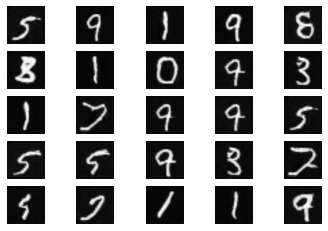

[5 9 1 9 5 3 1 0 9 3 1 7 9 9 5 5 5 9 3 7 5 7 1 1 9]


In [21]:
import matplotlib
batch_size = 25
latent_size = 2

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G_relu_2D(fixed_noise)


fake_images_np = fake_images.cpu().detach().numpy()

T = torchvision.transforms.Resize((32,32))
vector_imgs = T(fake_images).to('cpu').detach().numpy()

prediction = net(torch.from_numpy(vector_imgs).to(device, dtype=torch.float)).to('cpu').detach().numpy()
prediction = np.argmax(prediction, axis=1) 

R, C = 5, 5
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0], cmap='gray')
plt.show()
print(prediction)

In [22]:
from numpy import linspace
from numpy import asarray
from matplotlib import pyplot

def average_points(points, ix):
	# convert to zero offset points
	zero_ix = [i-1 for i in ix]
	# retrieve required points
	latent_spaces = points[ix]
	# average the vectors
	avg_latent_space = torch.mean(latent_spaces, dim=0)
	# combine original and avg vectors
	return avg_latent_space

def find_points_class(class1, class2, generator="relu",latent_size=100):
  batch_size = 100
  if generator == "tanh":
    batch_size = 20
  fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
  if torch.cuda.is_available():
      fixed_noise = fixed_noise.cuda()
  if generator == "relu":
    fake_images = G_relu(fixed_noise)
  elif generator == "tanh":
    fake_images = G_tanh(fixed_noise)
  elif generator == "sigmoid":
    fake_images = G_sigmoid(fixed_noise)
  elif generator == "relu_2D":
    fake_images = G_relu_2D(fixed_noise)
  elif generator == "relu_200D":
    fake_images = G_relu_200D(fixed_noise)
  fake_images_np = fake_images.cpu().detach().numpy()

  T = torchvision.transforms.Resize((32,32))
  vector_imgs = T(fake_images).to('cpu').detach().numpy()

  prediction = net(torch.from_numpy(vector_imgs).to(device, dtype=torch.float)).to('cpu').detach().numpy()
  prediction = np.argmax(prediction, axis=1) 
  c1 = [i for i, x in enumerate(prediction) if x == class1]
  c2 = [i for i, x in enumerate(prediction) if x == class2]
  return average_points(fixed_noise, c1).cuda(), average_points(fixed_noise, c2).cuda()


# uniform interpolation between two points in latent space
def interpolate_points_linear(p1, p2, n_steps=15, generator = "relu",latent_size=100):
  # interpolate ratios between the points
  if isinstance(p1, int) and isinstance(p2, int):
    p1, p2 = find_points_class(p1, p2, generator, latent_size=latent_size)
  ratios = linspace(0, 1, num=n_steps)
  batch_size = n_steps
  res = torch.zeros(batch_size, latent_size, 1, 1)
  if torch.cuda.is_available():
    res = res.cuda()
  
  i = 0
  for ratio in ratios:
    res[i] = torch.add((1.0 - ratio) * p1, ratio * p2)
    i+=1
  return res

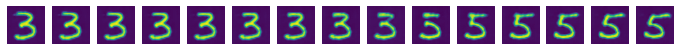

In [23]:
interpolated = interpolate_points_linear(3, 5, generator="relu")
fake_images = G_relu(interpolated)

fake_images_np = fake_images.cpu().detach().numpy()
R, C = 5, 5
plt.figure(figsize=(20, 20))
for i in range(fake_images_np.shape[0]):
    plt.subplot(1, R*C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()

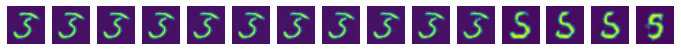

In [ ]:
interpolated = interpolate_points_linear(3, 5, generator="tanh")
fake_images = G_tanh(interpolated)

fake_images_np = fake_images.cpu().detach().numpy()

R, C = 5, 5
plt.figure(figsize=(20, 20))
for i in range(fake_images_np.shape[0]):
    plt.subplot(1, R*C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()

In [ ]:
interpolated = interpolate_points_linear(3, 5, generator="sigmoid")
fake_images = G_sigmoid(interpolated)

fake_images_np = fake_images.cpu().detach().numpy()

R, C = 5, 5
plt.figure(figsize=(20, 20))
for i in range(fake_images_np.shape[0]):
    plt.subplot(R, C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0], cmap='gray')
plt.show()

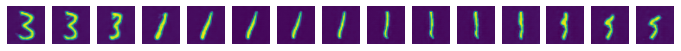

In [ ]:
interpolated = interpolate_points_linear(3, 5, generator="relu_2D", latent_size = 2)
fake_images = G_relu_2D(interpolated)

fake_images_np = fake_images.cpu().detach().numpy()
R, C = 5, 5
plt.figure(figsize=(20, 20))
for i in range(fake_images_np.shape[0]):
    plt.subplot(1, R*C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()

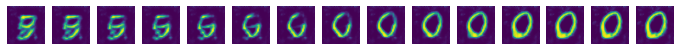

In [ ]:
interpolated = interpolate_points_linear(3, 5, generator="relu_200D",latent_size = 200)
fake_images = G_relu_200D(interpolated)

fake_images_np = fake_images.cpu().detach().numpy()
R, C = 5, 5
plt.figure(figsize=(20, 20))
for i in range(fake_images_np.shape[0]):
    plt.subplot(1, R*C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()

In [ ]:

# spherical linear interpolation (slerp)
def slerp(val, low, high):
  omega = torch.arccos(torch.clip(torch.dot(low[:,0,0]/torch.norm(low[:,0,0]), high[:,0,0]/torch.norm(high[:,0,0])), -1, 1))
  so = torch.sin(omega)
  if so == 0:
    # L'Hopital's rule/LERP
    return (1.0-val) * low + val * high
  return torch.sin((1.0-val)*omega) / so * low + torch.sin(val*omega) / so * high

# uniform interpolation between two points in latent space
def interpolate_points_spherical(p1, p2, n_steps=15, generator="relu", latent_size=100):
  if isinstance(p1, int) and isinstance(p2, int):
    p1, p2 = find_points_class(p1, p2, generator,latent_size=latent_size)
	# interpolate ratios between the points
  ratios = linspace(0, 1, num=n_steps)
  batch_size = n_steps
  res = torch.zeros(batch_size, latent_size, 1, 1)
  if torch.cuda.is_available():
    res = res.cuda()
  i = 0
  for ratio in ratios:
    res[i] = slerp(ratio, p1, p2)
    i = i+1
  return res

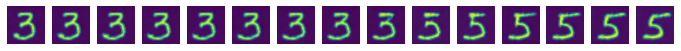

In [ ]:
interpolated = interpolate_points_spherical(3, 5, generator="relu")

fake_images = G_relu(interpolated)

fake_images_np = fake_images.cpu().detach().numpy()

R, C = 5, 5
plt.figure(figsize=(20, 20))
for i in range(fake_images_np.shape[0]):
    plt.subplot(1, R*C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()

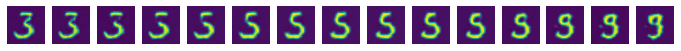

In [ ]:
interpolated = interpolate_points_spherical(3, 5, generator="tanh")

fake_images = G_tanh(interpolated)

fake_images_np = fake_images.cpu().detach().numpy()

R, C = 5, 5
plt.figure(figsize=(20, 20))
for i in range(fake_images_np.shape[0]):
    plt.subplot(1, R*C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()

In [ ]:
interpolated = interpolate_points_spherical(3, 5, generator="sigmoid")

fake_images = G_sigmoid(interpolated)

fake_images_np = fake_images.cpu().detach().numpy()

R, C = 5, 5
plt.figure(figsize=(20, 20))
for i in range(fake_images_np.shape[0]):
    plt.subplot(1, R*C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()

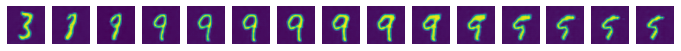

In [ ]:
interpolated = interpolate_points_spherical(3, 5, generator="relu_2D", latent_size = 2)

fake_images = G_relu_2D(interpolated)

fake_images_np = fake_images.cpu().detach().numpy()


R, C = 5, 5
plt.figure(figsize=(20, 20))
for i in range(fake_images_np.shape[0]):
    plt.subplot(1, R*C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()

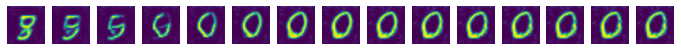

In [ ]:
interpolated = interpolate_points_spherical(3, 5, generator="relu_200D", latent_size = 200)

fake_images = G_relu_200D(interpolated)

fake_images_np = fake_images.cpu().detach().numpy()


R, C = 5, 5
plt.figure(figsize=(20, 20))
for i in range(fake_images_np.shape[0]):
    plt.subplot(1, R*C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()

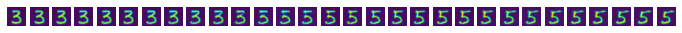

In [ ]:
from PIL import Image

def interpolation_to_gif(): # based on (https://avandekleut.github.io/vae/)
  interpolated = interpolate_points_spherical(3, 5,n_steps=30, generator="relu")
  fake_images = G_relu(interpolated)

  fake_images_np = fake_images.cpu().detach().numpy()
  R, C = 10, 5
  plt.figure(figsize=(20, 20))
  for i in range(fake_images_np.shape[0]):
      plt.subplot(1, R*C, i + 1)
      plt.axis("off")
      plt.imshow(fake_images_np[i,0])
      plt.imsave("frame-"+str(i)+".jpg", fake_images_np[i,0])
  plt.show()

interpolation_to_gif()

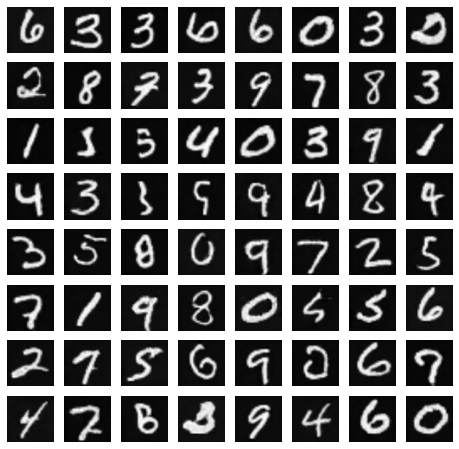

[6 3 3 6 6 0 3 0 2 8 7 3 9 7 8 3 1 1 3 4 0 3 9 1 4 3 1 5 9 4 8 4 3 5 8 0 9
 7 2 5 7 1 9 3 0 5 5 6 2 7 5 6 9 2 6 9 4 2 8 3 9 4 6 0]


In [ ]:
batch_size = 64
latent_size = 100

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G_relu(fixed_noise)


fake_images_np = fake_images.cpu().detach().numpy()

T = torchvision.transforms.Resize((32,32))
vector_imgs = T(fake_images).to('cpu').detach().numpy()

prediction = net(torch.from_numpy(vector_imgs).to(device, dtype=torch.float)).to('cpu').detach().numpy()
prediction = np.argmax(prediction, axis=1) 

R, C = 8, 8
plt.figure(figsize=(8, 8))
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.axis('off')
    plt.imshow(fake_images_np[i,0], cmap='gray')

plt.show()
print(prediction)

In [ ]:
from numpy import vstack
from numpy import mean
# average list of latent space vectors
def average_points(points, ix):
	zero_ix = [i-1 for i in ix]
	latent_spaces = points[ix]
	avg_latent_space = torch.mean(latent_spaces, dim=0)
	return avg_latent_space

zeros = [i for i, x in enumerate(prediction) if x == 0]
ones = [i for i, x in enumerate(prediction) if x == 1]
twos = [i for i, x in enumerate(prediction) if x == 2]
threes = [i for i, x in enumerate(prediction) if x == 3]
fours = [i for i, x in enumerate(prediction) if x == 4]
fives = [i for i, x in enumerate(prediction) if x == 5]
sixes = [i for i, x in enumerate(prediction) if x == 6]
sevens = [i for i, x in enumerate(prediction) if x == 7]
eights = [i for i, x in enumerate(prediction) if x == 8]
nines = [i for i, x in enumerate(prediction) if x == 9]

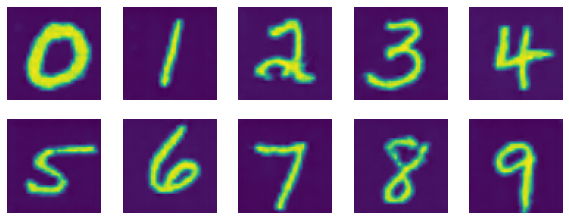

In [ ]:
avg = torch.zeros(10, latent_size, 1, 1).cuda()
avg[0] = average_points(fixed_noise, zeros).cuda()
avg[1] = average_points(fixed_noise, ones).cuda()
avg[2] = average_points(fixed_noise, twos).cuda()
avg[3] = average_points(fixed_noise, threes).cuda()
avg[4] = average_points(fixed_noise, fours).cuda()
avg[5] = average_points(fixed_noise, fives).cuda()
avg[6] = average_points(fixed_noise, sixes).cuda()
avg[7] = average_points(fixed_noise, sevens).cuda()
avg[8] = average_points(fixed_noise, eights).cuda()
avg[9] = average_points(fixed_noise, nines).cuda()
fake_images = G_relu(avg)

fake_images_np = fake_images.cpu().detach().numpy()
R, C = 5, 5
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(R, C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()

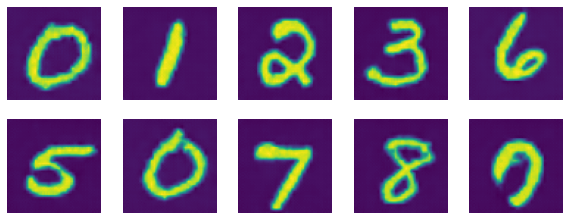

[0 1 2 3 6 5 0 7 8 7]


In [ ]:
addition_zero = torch.zeros(10, latent_size, 1, 1).cuda()
addition_zero[0] = torch.add(avg[0], avg[0])
addition_zero[1] = torch.add(avg[0], avg[1])
addition_zero[2] = torch.add(avg[0], avg[2])
addition_zero[3] = torch.add(avg[0], avg[3])
addition_zero[4] = torch.sub(torch.add(avg[0], avg[4]), avg[7])
addition_zero[5] = torch.add(avg[0], avg[5])
addition_zero[6] = torch.add(avg[0], avg[6])
addition_zero[7] = torch.add(avg[0], avg[7])
addition_zero[8] = torch.add(avg[0], avg[8])
addition_zero[9] = torch.add(avg[0], avg[9])

fake_images = G_relu(addition_zero)

fake_images_np = fake_images.cpu().detach().numpy()

T = torchvision.transforms.Resize((32,32))
vector_imgs = T(fake_images).to('cpu').detach().numpy()

prediction = net(torch.from_numpy(vector_imgs).to(device, dtype=torch.float)).to('cpu').detach().numpy()
prediction = np.argmax(prediction, axis=1) 

R, C = 5, 5
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(R, C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()
print(prediction)

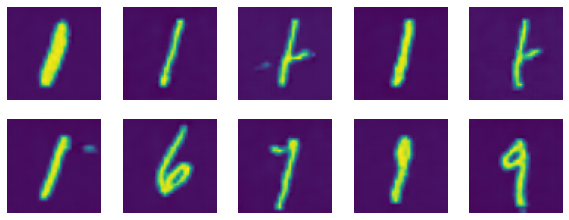

[1 1 1 1 1 1 6 7 1 9]


In [ ]:
addition_one = torch.zeros(10, latent_size, 1, 1).cuda()
addition_one[0] = torch.add(avg[1], avg[0])
addition_one[1] = torch.add(avg[1], avg[1])
addition_one[2] = torch.add(avg[1], avg[2])
addition_one[3] = torch.add(avg[1], avg[3])
addition_one[4] = torch.add(avg[1], avg[4])
addition_one[5] = torch.add(avg[1], avg[5])
addition_one[6] = torch.add(avg[1], avg[6])
addition_one[7] = torch.add(avg[1], avg[7])
addition_one[8] = torch.add(avg[1], avg[8])
addition_one[9] = torch.add(avg[1], avg[9])

fake_images =  G_relu(addition_one)

fake_images_np = fake_images.cpu().detach().numpy()

T = torchvision.transforms.Resize((32,32))
vector_imgs = T(fake_images).to('cpu').detach().numpy()

prediction = net(torch.from_numpy(vector_imgs).to(device, dtype=torch.float)).to('cpu').detach().numpy()
prediction = np.argmax(prediction, axis=1) 

R, C = 5, 5
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(R, C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()
print(prediction)

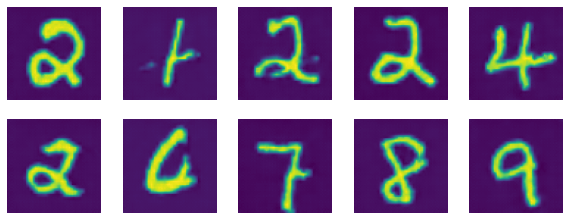

[2 1 2 2 4 2 6 7 8 9]


In [ ]:
addition_two = torch.zeros(10, latent_size, 1, 1).cuda()
addition_two[0] = torch.add(avg[2], avg[0])
addition_two[1] = torch.add(avg[2], avg[1])
addition_two[2] = torch.add(avg[2], avg[2])
addition_two[3] = torch.add(avg[2], avg[3])
addition_two[4] = torch.add(avg[2], avg[4])
addition_two[5] = torch.add(avg[2], avg[5])
addition_two[6] = torch.add(avg[2], avg[6])
addition_two[7] = torch.add(avg[2], avg[7])
addition_two[8] = torch.add(avg[2], avg[8])
addition_two[9] = torch.add(avg[2], avg[9])

fake_images =  G_relu(addition_two)

fake_images_np = fake_images.cpu().detach().numpy()

T = torchvision.transforms.Resize((32,32))
vector_imgs = T(fake_images).to('cpu').detach().numpy()

prediction = net(torch.from_numpy(vector_imgs).to(device, dtype=torch.float)).to('cpu').detach().numpy()
prediction = np.argmax(prediction, axis=1) 

R, C = 5, 5
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(R, C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()
print(prediction)

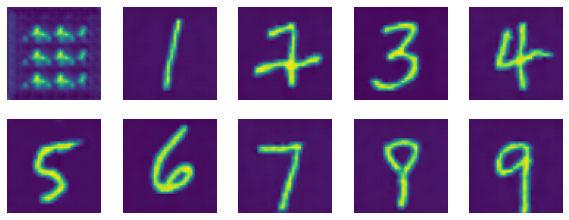

[5 1 2 3 4 5 6 7 9 9]


In [ ]:
substraction_zero = torch.zeros(10, latent_size, 1, 1).cuda()
substraction_zero[0] = torch.sub(avg[0], avg[0])
substraction_zero[1] = torch.sub(avg[1], avg[0])
substraction_zero[2] = torch.sub(avg[2], avg[0])
substraction_zero[3] = torch.sub(avg[3], avg[0])
substraction_zero[4] = torch.sub(avg[4], avg[0])
substraction_zero[5] = torch.sub(avg[5], avg[0])
substraction_zero[6] = torch.sub(avg[6], avg[0])
substraction_zero[7] = torch.sub(avg[7], avg[0])
substraction_zero[8] = torch.sub(avg[8], avg[0])
substraction_zero[9] = torch.sub(avg[9], avg[0])

fake_images =  G_relu(substraction_zero)

fake_images_np = fake_images.cpu().detach().numpy()
#fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 28, 28)

T = torchvision.transforms.Resize((32,32))
vector_imgs = T(fake_images).to('cpu').detach().numpy()

prediction = net(torch.from_numpy(vector_imgs).to(device, dtype=torch.float)).to('cpu').detach().numpy()
prediction = np.argmax(prediction, axis=1) 

R, C = 5, 5
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(R, C, i + 1)
    plt.axis("off")
    plt.imshow(fake_images_np[i,0])
plt.show()
print(prediction)

# Visulation de l'espace latent

In [ ]:
def space_representation(generator, r0=(-5, 10), r1=(-10, 5), n=10, latent_size=100, w = 28, tsne=False):
    img = np.zeros((n*w, n*w))
    pred = np.zeros((n,n))
    vector_imgs = np.zeros((n*n, 1, 32, 32))
    
    if latent_size == 2 and not tsne:
      for i, y in enumerate(np.linspace(*r0, n)):
          for j, x in enumerate(np.linspace(*r1, n)):
              # For a point (x, y) in latent space, decode it to find its reconstruction x_hat
              
              # a point
              z = torch.Tensor([[x, y]]).reshape(1, 2, 1, 1).to(device)
              # generated image
              x_hat = generator(z)
              
              x_hat_np = x_hat.detach().cpu().numpy()
              x_hat_torch = torch.Tensor(x_hat_np).to(device)
              x_hat_np = x_hat_np.reshape(x_hat_np.shape[0], w, w)
              img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat_np

              # Classify the reconstruction
              T = torchvision.transforms.Resize((32,32))
              vector_imgs[j*n+i] = T(x_hat_torch).to('cpu').numpy()#.detach()
    else : 
      z = torch.randn(n*n, latent_size, 1, 1)
      if torch.cuda.is_available():
        z = z.cuda()
      x_hat = generator(z)
      x_hat_np = x_hat.cpu().detach().numpy()
      img = x_hat_np.reshape(x_hat_np.shape[0], w, w)
      img = x_hat_np
      # Classify the reconstruction
      T = torchvision.transforms.Resize((32,32))
      vector_imgs = T(x_hat).to('cpu').detach().numpy()
      
    prediction = net(torch.from_numpy(vector_imgs).to(device, dtype=torch.float)).to('cpu').detach().numpy()
    prediction = np.argmax(prediction, axis=1) 
    prediction_square = prediction.reshape((n,n))
    prediction_square = np.rot90(prediction_square, k=1, axes=(0, 1))
    return img, prediction_square, prediction

In [ ]:
def plot_space_representation_2D(prediction, r0, r1, n):
    pos = np.zeros((n,n,2))
    for i in range(prediction.shape[0]):
      for j in range(prediction.shape[0]):
        pos[i,j,0] = r0[1] - (r0[1] - r0[0])*1/n*i
        pos[i,j,1] = r0[1] - (r0[1] - r0[0])*1/n*j
    
    plt.figure(figsize=(12,10))
    plt.scatter(pos[:, :, 1], pos[:, :, 0], c=prediction, cmap='tab10')
    plt.colorbar()
    plt.title('Représentation de l\'espace latent avec interpolation')
    plt.show()

## Pour un espace latent de 2 dimensions

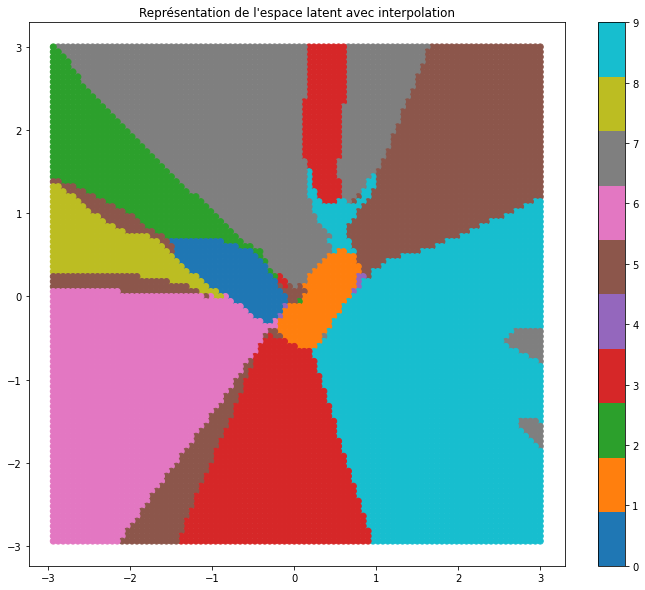

In [ ]:
latent_size = 2


r0 = (-3, 3)
r1 = (-3, 3)
n = 100

img, prediction_square, prediction = space_representation(generator=G_relu_2D, r0=r0, r1=r1, n=n, latent_size=latent_size, w=64)
plot_space_representation_2D(prediction_square, r0, r1, n)


## TSNE pour un modèle à définir 

In [ ]:
import time
from sklearn.manifold import TSNE


def TSNE_f(model, latent_size, r0 = (-3, 3), r1 = (-3, 3), n=80, tsne=False):

  img, prediction_square, prediction = space_representation(generator=model, r0=r0, r1=r1, n=n, latent_size=latent_size, w=64, tsne=tsne)
  flattenend_images = [i.flatten() for i in img]

  time_start = time.time()
  tsne = TSNE(n_iter=300)
  tsne_results = tsne.fit_transform(flattenend_images)

  print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

  plt.figure(figsize=(12,10))
  plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=prediction, cmap='tab10')
  plt.colorbar()
  plt.title('Représentation de l\'espace latent avec interpolation')
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 25.209995985031128 seconds


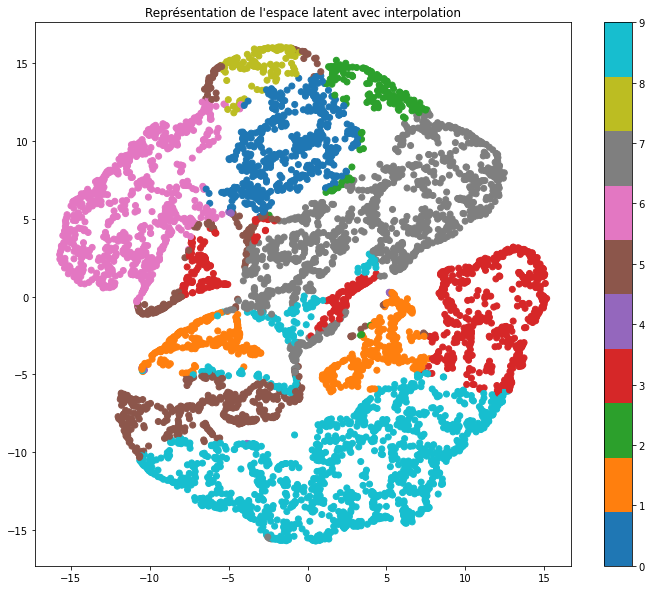

In [ ]:
r0 = (-3, 3)
r1 = (-3, 3)
n = 80 #number of samples

latent_size = 2 # To modify according to the model
model = G_relu_2D
TSNE_f(model, latent_size, r0 = (-3, 3), r1 = (-3, 3), n=80, tsne = True)
